In [1]:
# Nmae : Himanshu Agarwal , Net id: HXA180027
#q1.4 Boston housing dataset
#mporting libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [2]:
#import data using the pandas libraries.
boston_data = pd.read_csv("HousingData.csv")
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


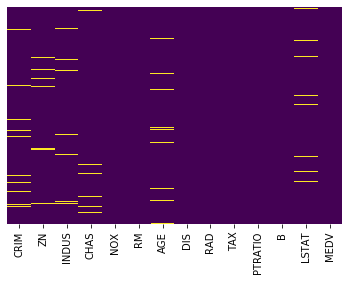

In [3]:
#Heatmap to check the missig values
sns.heatmap(boston_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#Yellow color shows that values are missing.
# Handling missing values by replacing them by their mean values
boston_data=boston_data.fillna(boston_data.mean())
# Now checking again the count of missing/null values 
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

All count 0, shows no any missing value present.
Now, we need to perform Exploratory Data Analysis. It is a very important step before training the model. 
In this section, we will use some visualizations to understand the relationship of the target variable with other features.

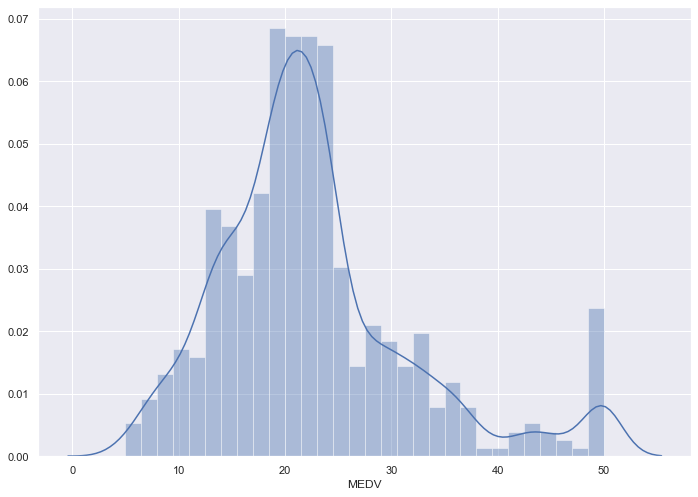

In [5]:
#distribution of the target variable MEDV, using the distplot function from the seaborn library
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['MEDV'], bins=30)
plt.show()

In [6]:
 #This shows that values of MEDV are distributed normally with few outlier.

In [7]:
# create a correlation matrix that measures the linear relationships between the variables.
#The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
#We will use the heatmap function from the seaborn library to plot the correlation matrix

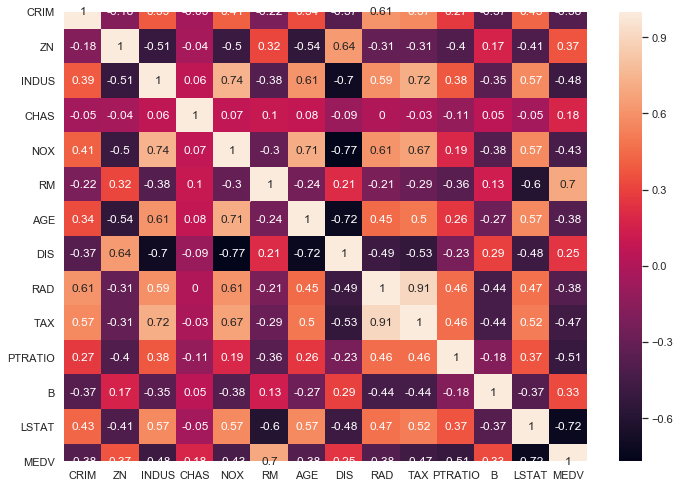

In [8]:
correlation_matrix = boston_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


In [9]:
'''
Feature selection using correlation matrix:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. 
By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) 
where as LSTAT has a high negative correlation with MEDV(-0.72).
An important point in selecting features for a linear regression model is to check for multi-co-linearity. 
The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other.
We should not select both these features together for training the model. Check this for an explanation. 
Same goes for the features DIS and AGE which have a correlation of -0.75
'''

'\nFeature selection using correlation matrix:\n\nTo fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. \nBy looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) \nwhere as LSTAT has a high negative correlation with MEDV(-0.72).\nAn important point in selecting features for a linear regression model is to check for multi-co-linearity. \nThe features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other.\nWe should not select both these features together for training the model. Check this for an explanation. \nSame goes for the features DIS and AGE which have a correlation of -0.75\n'

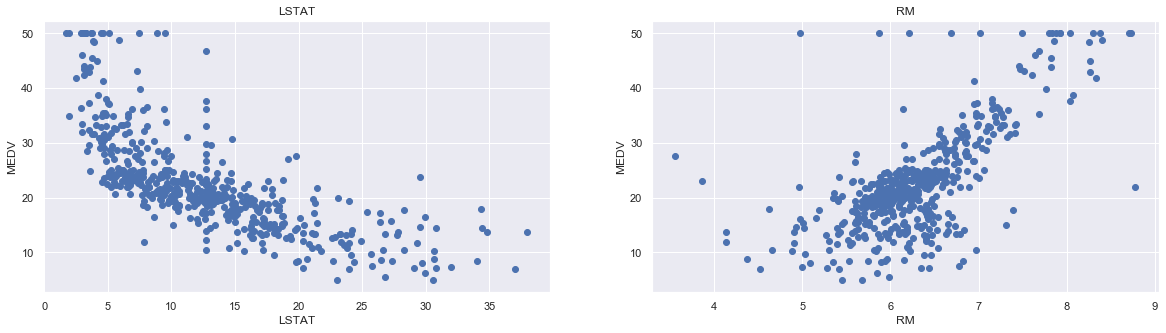

In [10]:
#Using a scatter plot let’s see how these features vary with MEDV.
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = boston_data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    


In [11]:
#The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
#The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [12]:
#Preprocessing data to implement Linear Regression using SGD with Nesterov momentum

In [13]:
#We concatenate on the LSTAT and RM columns using np.c_ provided by the numpy library.
boston_data = pd.DataFrame(np.c_[boston_data['LSTAT'], boston_data['RM'],boston_data['MEDV']], columns = ['LSTAT','RM','MEDV'])


In [14]:
#spliting data in training and test set
#To train the model with 70% of the samples and test with the remaining 30%. 
n = int(len(boston_data)*0.70)
df_train, df_test = boston_data.iloc[:n, :], boston_data.iloc[n:, :]

In [15]:
# Initial Coefficients
B = np.array([0, 0, 0])  #Weights array 
alpha = 0.0001  # Learning rate

#Spliting the training and testing data in X,Y train and test sets.
m = len(df_train.iloc[:,:-1])
x0 = np.ones(m)
Xtrain = np.array([x0, df_train['LSTAT'],df_train['RM']]).T
ytrain = np.array(df_train['MEDV'])

m = len(df_test.iloc[:,:-1])
x0 = np.ones(m)
Xtest= np.array([x0, df_test['LSTAT'], df_test['RM']]).T
ytest= np.array(df_test['MEDV'])

In [16]:
#Cost function 
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [17]:
#mplementation of linear regression for the given numbers of iterations.
def gradient_descent(boston_data, B, alpha, iterations):
    cost_history = [0] * iterations
    k=10
    vt=0
    gamma = 0.9
    for iteration in range(iterations):
        # Hypothesis Values
        temp= boston_data.sample(k)
        lstat = temp['LSTAT']
        rm =   temp['RM']
        m = len(lstat)
        x0 = np.ones(m)
        X1 = np.array([x0, lstat, rm]).T
        Y1 = np.array(temp['MEDV'])
        h = X1.dot(B-gamma*vt)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y1
        # Gradient Calculation
        vt = (gamma*vt) + alpha * (X1.T.dot(loss)/k)
        # Changing Values of B using Gradient
        B = B - vt
        # New Cost Value
        cost = cost_function(X1, Y1, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [18]:
#evaluating our model using RMSE and R2-score.
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [19]:
newB, cost_history = gradient_descent(df_train, B, alpha, 10000)
# New Values of B
Y_pred = Xtrain.dot(newB)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse(ytrain, Y_pred)))
print('R2 score is {}'.format(r2_score(ytrain, Y_pred)))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.530565418524212
R2 score is 0.710848998767142




In [20]:
#newB, cost_history = gradient_descent(df_test, B, alpha, 10000)
Y_pred = Xtest.dot(newB)
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse(ytest, Y_pred)))
print('R2 score is {}'.format(r2_score(ytest, Y_pred)))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 7.730537046869379
R2 score is 0.09925304354088482


